# Análise Univariada
Faça uma análise univariada de todas as variáveis da análise.

Depois julgue como proceder com os casos faltantes nas variáveis.

Em seguida, re-agrupe ou re-codifique as variáveis que julgar necessário.

## Inicialização

### Importando pacotes e carregando dados

In [1]:
import math
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns

import utils  # Funções auxiliares para a análise

# Oculta warnings do notebook
import warnings
warnings.filterwarnings('ignore')

# Configurações para facilitar a visualização dos dataframes
pd.set_option('display.max_rows', 35)
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Carregando dados pré-processados
dataset_path = '../data/output/'
dataset_name = 'step_1_output.csv'

df = pd.read_csv(f"{dataset_path}{dataset_name}")

### Checagem de informações gerais

In [3]:
df.describe()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,PHQ9,PHQ_GRP,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,"5,334.00","4,827.00","4,831.00","4,829.00","4,831.00","4,832.00","4,831.00","4,832.00","4,827.00","4,834.00","4,836.00","4,836.00","5,334.00","5,334.00","5,334.00","5,326.00","5,174.00","5,334.00","5,334.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00"
mean,"36,358.80",0.29,0.30,0.54,0.71,0.31,0.20,0.22,0.13,0.05,2.75,0.30,1.52,45.09,2.87,3.23,6.92,471.77,1.98,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97
std,"2,964.73",0.66,0.65,0.87,0.87,0.70,0.56,0.59,0.45,0.27,3.75,0.68,0.50,20.15,1.13,1.26,3.14,780.35,0.92,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32
min,"31,130.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06
25%,"33,838.50",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,3.00,2.00,4.00,35.00,1.00,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03
50%,"36,347.50",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,43.00,3.00,3.00,7.00,210.00,2.00,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51
75%,"38,915.75",0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,2.00,62.00,4.00,4.00,10.00,568.93,3.00,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17
max,"41,473.00",3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,27.00,4.00,2.00,85.00,5.00,5.00,13.00,"10,777.83",3.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53


In [4]:
df.sample(5)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,PHQ9,PHQ_GRP,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
3401,37792,0.00,0.00,3.00,1.00,0.00,0.00,1.00,0.00,0.00,5.00,1.00,1,50,1,5.00,11.00,"2,276.81",3.00,3.26,4.20,2.58,5.00,5.00,5.00,5.00,5.00,3.07,0.95,8.70,5.58,10.00,63.34
1037,33245,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,2.00,0.00,2,32,3,4.00,11.00,459.42,3.00,2.52,0.00,3.71,4.69,2.11,3.45,5.00,4.91,6.87,3.76,0.00,8.44,5.23,50.69
1085,33337,2.00,2.00,0.00,3.00,0.00,1.00,0.00,0.00,0.00,8.00,1.00,2,68,4,1.00,6.00,207.85,2.00,0.21,0.00,0.00,0.00,0.00,1.82,5.00,0.00,0.00,0.13,0.00,0.00,9.34,16.49
563,32256,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2,42,1,1.00,5.00,41.57,1.00,4.13,2.22,2.37,1.26,5.00,3.93,3.78,0.00,7.96,5.63,1.91,10.00,2.56,50.75
3156,37336,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,2.00,0.00,2,34,4,3.00,3.00,381.06,3.00,0.24,0.00,0.00,0.00,0.00,3.23,5.00,0.51,4.57,5.57,4.05,6.00,0.66,29.84


<AxesSubplot: >

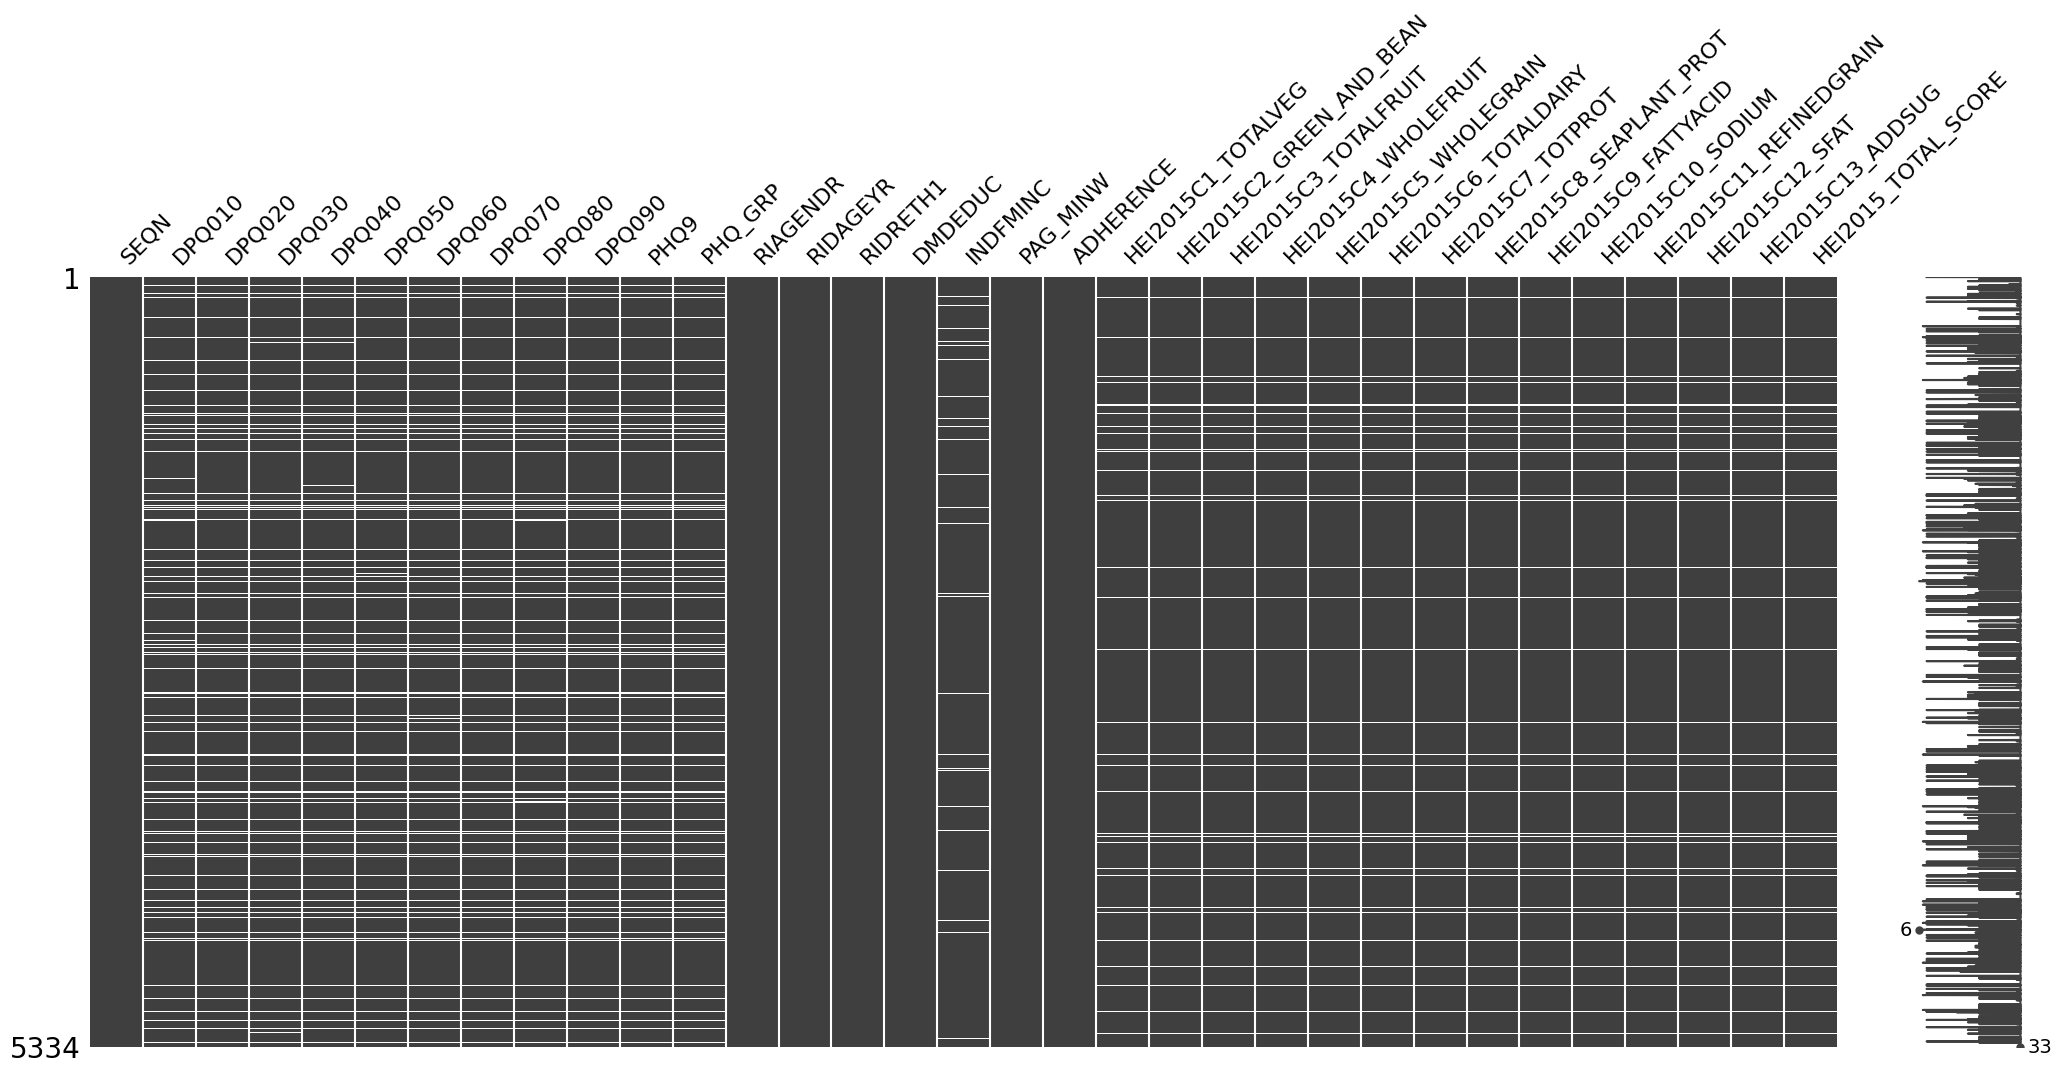

In [5]:
# Verificando valores nulos
msno.matrix(df)

<AxesSubplot: >

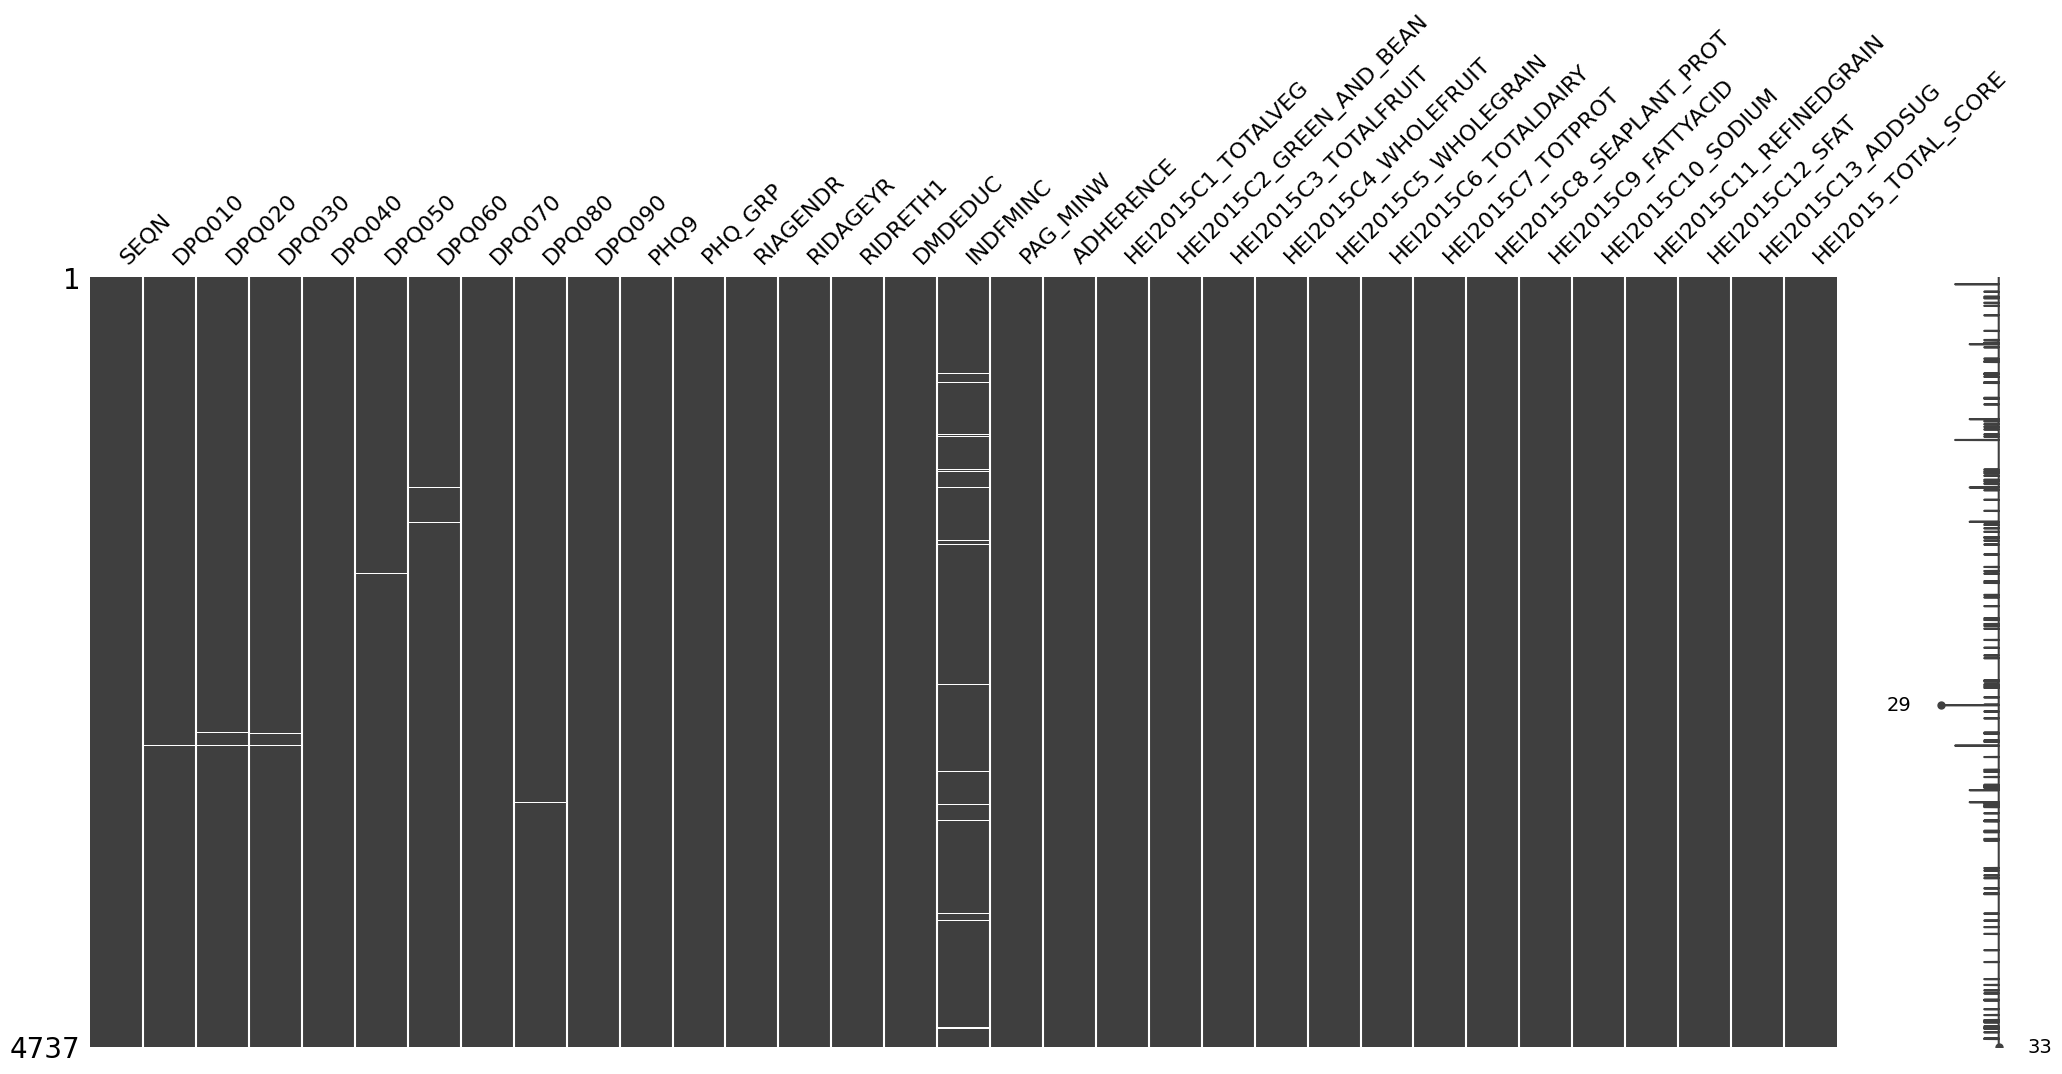

In [6]:
# Verificando valores nulos somente em linhas que responderam o PHQ-9 e o HEI
answered_phq9 = df.PHQ9.notna()
answered_hei = df.HEI2015_TOTAL_SCORE.notna()

msno.matrix(df[answered_phq9 * answered_hei])

### Separação das colunas

As colunas serão separadas de acordo com sua origem, para facilitar a organização das análises

In [7]:
def split_columns_by_source(df, step=1):
    is_phq_column = lambda x: True if (x.find('DPQ') > -1) else False
    phq_cols = [col for col in df.columns if is_phq_column(col)]
    
    is_hei_column = lambda x: True if (x.find('HEI2015') > -1) else False
    hei_cols = [col for col in df.columns if is_hei_column(col)]
    
    demo_cols = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC']
    pag_cols = ['PAG_MINW', 'ADHERENCE']
    phq_score_cols = ['PHQ9', 'PHQ_GRP']
    
    return demo_cols, phq_cols, hei_cols, pag_cols, phq_score_cols

In [8]:
# Separando colunas de acordo com suas origens
demo_cols, phq_cols, hei_cols, pag_cols, phq_score_cols = split_columns_by_source(df)

print(demo_cols)
print(phq_cols)
print(hei_cols)
print(pag_cols)
print(phq_score_cols)

['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC']
['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']
['HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']
['PAG_MINW', 'ADHERENCE']
['PHQ9', 'PHQ_GRP']


## Análise das Variáveis

### Dados do PHQ-9

#### Visualização

In [9]:
df[phq_cols + phq_score_cols].describe()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,PHQ9,PHQ_GRP
count,"4,827.00","4,831.00","4,829.00","4,831.00","4,832.00","4,831.00","4,832.00","4,827.00","4,834.00","4,836.00","4,836.00"
mean,0.29,0.30,0.54,0.71,0.31,0.20,0.22,0.13,0.05,2.75,0.30
std,0.66,0.65,0.87,0.87,0.70,0.56,0.59,0.45,0.27,3.75,0.68
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00
max,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,27.00,4.00


Coluna: DPQ010

describe():
count   4,827.00
mean        0.29
std         0.66
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         3.00
Name: DPQ010, dtype: float64

value_counts(normalize=False):
0.00    3850
1.00     673
2.00     180
3.00     124
Name: DPQ010, dtype: int64

isnull():
507

histplot():


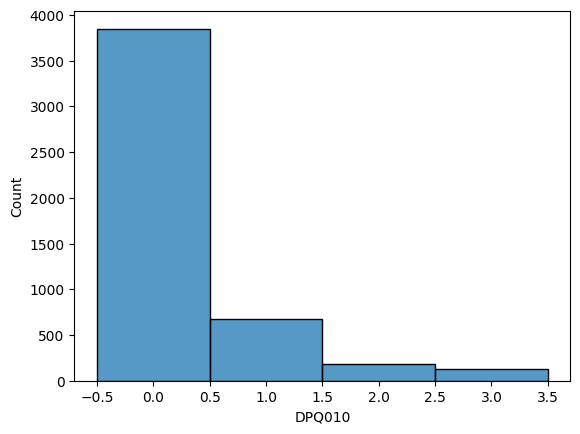



Coluna: DPQ020

describe():
count   4,831.00
mean        0.30
std         0.65
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         3.00
Name: DPQ020, dtype: float64

value_counts(normalize=False):
0.00    3769
1.00     769
2.00     179
3.00     114
Name: DPQ020, dtype: int64

isnull():
503

histplot():


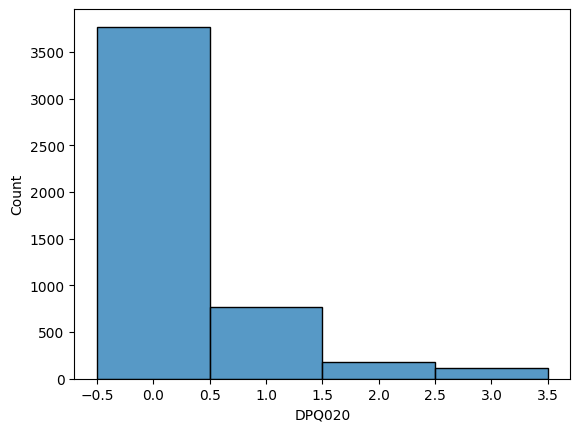



Coluna: DPQ030

describe():
count   4,829.00
mean        0.54
std         0.87
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         3.00
Name: DPQ030, dtype: float64

value_counts(normalize=False):
0.00    3152
1.00    1071
3.00     320
2.00     286
Name: DPQ030, dtype: int64

isnull():
505

histplot():


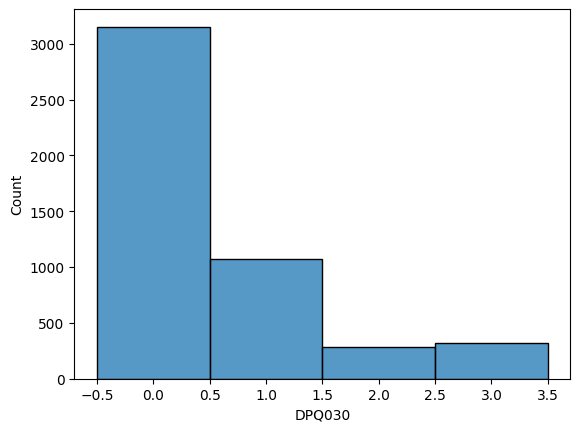



Coluna: DPQ040

describe():
count   4,831.00
mean        0.71
std         0.87
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         3.00
Name: DPQ040, dtype: float64

value_counts(normalize=False):
0.00    2429
1.00    1706
2.00     370
3.00     326
Name: DPQ040, dtype: int64

isnull():
503

histplot():


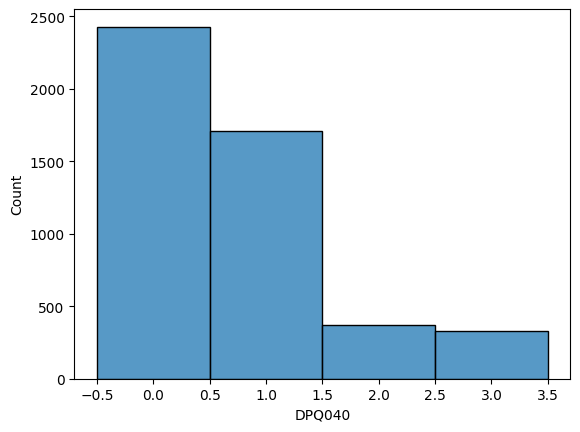



Coluna: DPQ050

describe():
count   4,832.00
mean        0.31
std         0.70
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         3.00
Name: DPQ050, dtype: float64

value_counts(normalize=False):
0.00    3813
1.00     691
3.00     168
2.00     160
Name: DPQ050, dtype: int64

isnull():
502

histplot():


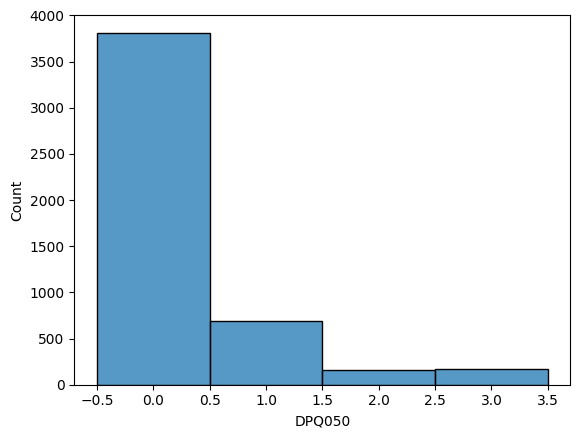



Coluna: DPQ060

describe():
count   4,831.00
mean        0.20
std         0.56
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         3.00
Name: DPQ060, dtype: float64

value_counts(normalize=False):
0.00    4134
1.00     513
2.00      95
3.00      89
Name: DPQ060, dtype: int64

isnull():
503

histplot():


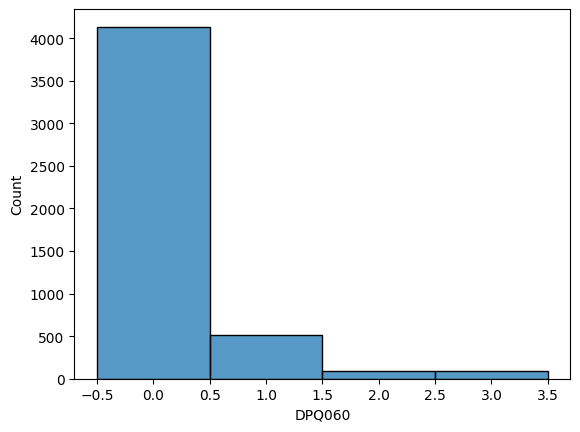



Coluna: DPQ070

describe():
count   4,832.00
mean        0.22
std         0.59
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         3.00
Name: DPQ070, dtype: float64

value_counts(normalize=False):
0.00    4070
1.00     545
2.00     118
3.00      99
Name: DPQ070, dtype: int64

isnull():
502

histplot():


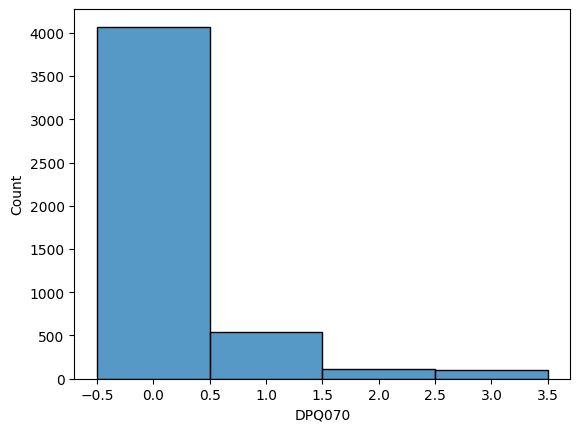



Coluna: DPQ080

describe():
count   4,827.00
mean        0.13
std         0.45
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         3.00
Name: DPQ080, dtype: float64

value_counts(normalize=False):
0.00    4362
1.00     341
2.00      79
3.00      45
Name: DPQ080, dtype: int64

isnull():
507

histplot():


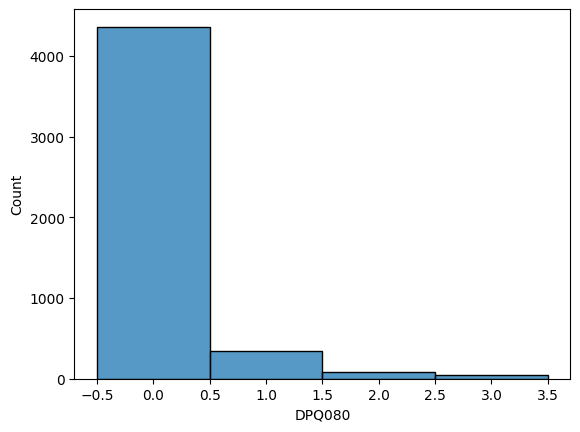



Coluna: DPQ090

describe():
count   4,834.00
mean        0.05
std         0.27
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         3.00
Name: DPQ090, dtype: float64

value_counts(normalize=False):
0.00    4667
1.00     122
2.00      32
3.00      13
Name: DPQ090, dtype: int64

isnull():
500

histplot():


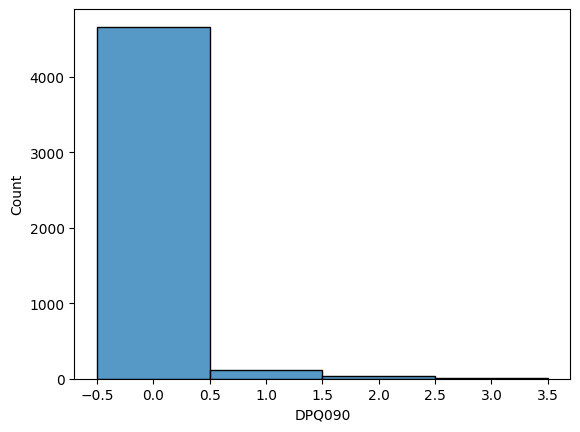



Coluna: PHQ9

describe():
count   4,836.00
mean        2.75
std         3.75
min         0.00
25%         0.00
50%         1.00
75%         4.00
max        27.00
Name: PHQ9, dtype: float64

value_counts(normalize=False):
0.00     1651
1.00      808
2.00      667
3.00      416
4.00      275
5.00      217
6.00      193
7.00      124
9.00       90
8.00       90
10.00      59
12.00      46
11.00      41
13.00      31
14.00      29
15.00      23
17.00      17
16.00      16
19.00      11
18.00       8
21.00       7
23.00       4
22.00       4
24.00       4
26.00       2
20.00       1
27.00       1
25.00       1
Name: PHQ9, dtype: int64

isnull():
498

histplot():


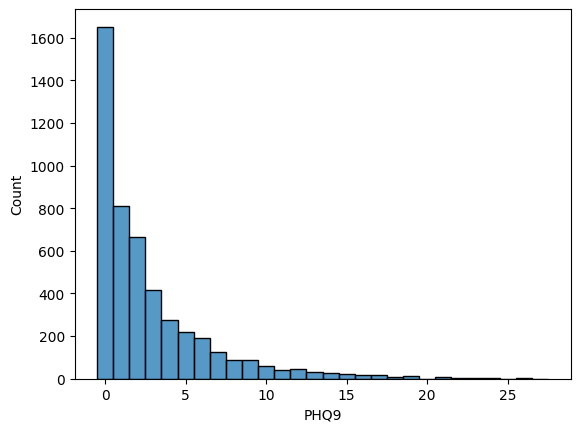



Coluna: PHQ_GRP

describe():
count   4,836.00
mean        0.30
std         0.68
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         4.00
Name: PHQ_GRP, dtype: float64

value_counts(normalize=False):
0.00    3817
1.00     714
2.00     206
3.00      64
4.00      35
Name: PHQ_GRP, dtype: int64

isnull():
498

histplot():


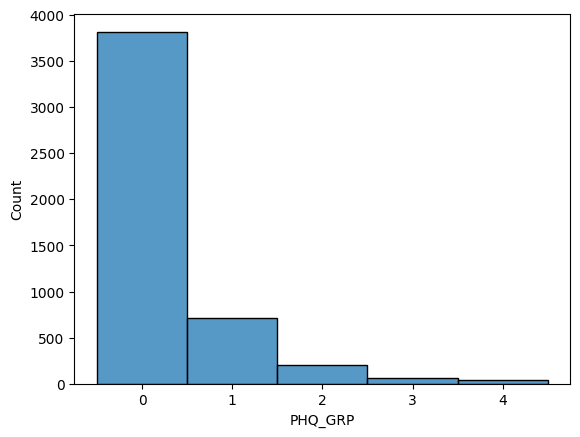

In [10]:
kwargs = {
    "discrete": True, 
}
for col in phq_cols + phq_score_cols:
    utils.column_analysis(df, col, normalize=False, plot_kwargs=kwargs)

#### Análise e Tratamento
Nada em específico para ser tratado por enquanto.

### Dados Demográficos

#### Visualização

Coluna: RIAGENDR

describe():
count   5,334.00
mean        1.52
std         0.50
min         1.00
25%         1.00
50%         2.00
75%         2.00
max         2.00
Name: RIAGENDR, dtype: float64

value_counts(normalize=False):
2    2773
1    2561
Name: RIAGENDR, dtype: int64

isnull():
0

histplot():


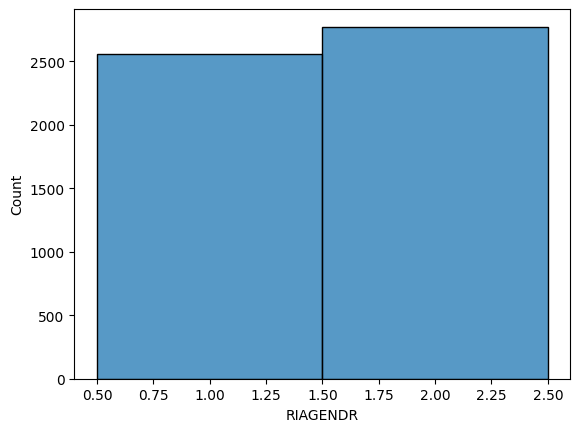



Coluna: RIDAGEYR

describe():
count   5,334.00
mean       45.09
std        20.15
min        18.00
25%        27.00
50%        43.00
75%        62.00
max        85.00
Name: RIDAGEYR, dtype: float64

value_counts(normalize=False):
18    301
19    260
85    148
29    113
23    111
     ... 
77     37
75     36
68     35
84     33
79     31
Name: RIDAGEYR, Length: 68, dtype: int64

isnull():
0

histplot():


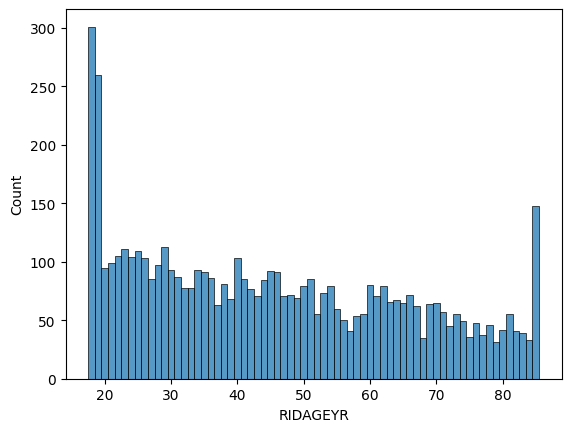



Coluna: RIDRETH1

describe():
count   5,334.00
mean        2.87
std         1.13
min         1.00
25%         3.00
50%         3.00
75%         4.00
max         5.00
Name: RIDRETH1, dtype: float64

value_counts(normalize=False):
3    2516
4    1300
1    1133
5     221
2     164
Name: RIDRETH1, dtype: int64

isnull():
0

histplot():


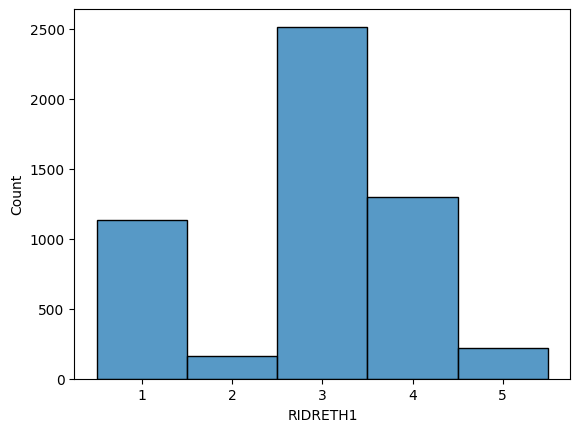



Coluna: DMDEDUC

describe():
count   5,326.00
mean        3.23
std         1.26
min         1.00
25%         2.00
50%         3.00
75%         4.00
max         5.00
Name: DMDEDUC, dtype: float64

value_counts(normalize=False):
4.00    1498
3.00    1335
5.00     939
2.00     936
1.00     618
Name: DMDEDUC, dtype: int64

isnull():
8

histplot():


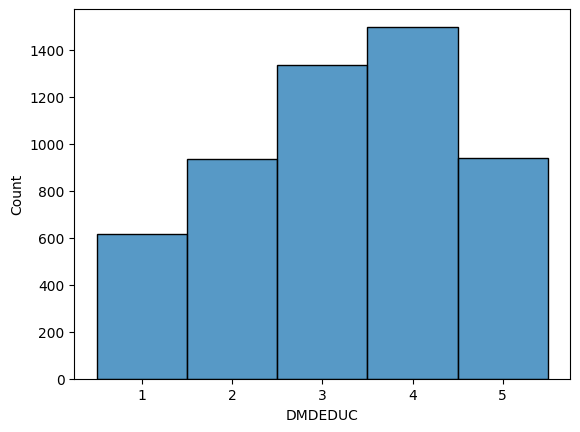



Coluna: INDFMINC

describe():
count   5,174.00
mean        6.92
std         3.14
min         1.00
25%         4.00
50%         7.00
75%        10.00
max        13.00
Name: INDFMINC, dtype: float64

value_counts(normalize=False):
11.00    1044
6.00      678
7.00      535
8.00      485
3.00      440
5.00      426
4.00      412
9.00      297
2.00      281
10.00     278
1.00      190
12.00      78
13.00      30
Name: INDFMINC, dtype: int64

isnull():
160

histplot():


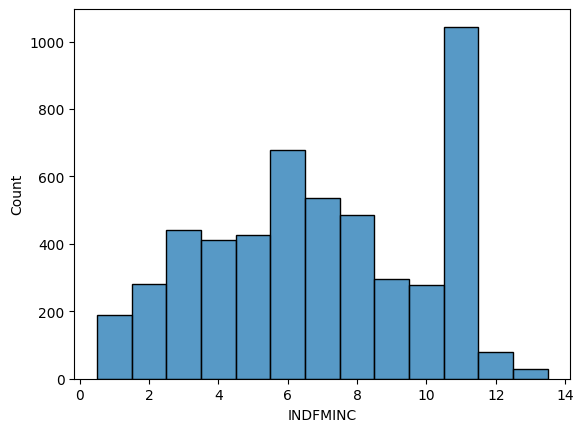

In [11]:
kwargs = {
    "discrete": True, 
}
for col in demo_cols:
    utils.column_analysis(df, col, normalize=False, plot_kwargs=kwargs)

In [12]:
df['INDFMINC'].value_counts()

11.00    1044
6.00      678
7.00      535
8.00      485
3.00      440
5.00      426
4.00      412
9.00      297
2.00      281
10.00     278
1.00      190
12.00      78
13.00      30
Name: INDFMINC, dtype: int64

#### Análise e Tratamento

##### RIAGENDR (category)
Como esta variável representa uma categoria, vamos converter uma coluna de valor numérico em colunas de valor booleano

In [13]:
df['RIAGENDR_M'] = np.where(df['RIAGENDR'] == 1, 1, 0)
df['RIAGENDR_F'] = np.where(df['RIAGENDR'] == 2, 1, 0)

In [14]:
index = demo_cols.index('RIAGENDR')
demo_cols.insert(index + 1, 'RIAGENDR_F')
demo_cols.insert(index + 1, 'RIAGENDR_M')

##### RIDAGEYR (reagrupamento)(pendente)
A distribuição da idade está concentrada nas pontas (nos valores 18, 19 e 85).
Isto pode indicar que os valores limite (18 e 85) não eram exatos, e sim "<18" e ">85" (porém não temos como confirmar).

**Opções de Tratamento:**
- Reagrupar os dados em intervalos para que a distribuição seja menos contrastante

In [15]:
df.RIDAGEYR.value_counts().sort_index()

18    301
19    260
20     95
21     99
22    105
     ... 
81     55
82     41
83     39
84     33
85    148
Name: RIDAGEYR, Length: 68, dtype: int64

##### RIDRETH1 (category)
Como esta variável representa uma categoria, vamos converter uma coluna de valor numérico em colunas de valor booleano

In [16]:
df['RIDRETH1_BRA'] = np.where(df['RIDRETH1'] == 1, 1, 0)
df['RIDRETH1_NEG'] = np.where(df['RIDRETH1'] == 2, 1, 0)
df['RIDRETH1_MEX'] = np.where(df['RIDRETH1'] == 3, 1, 0)
df['RIDRETH1_OUT'] = np.where(df['RIDRETH1'] == 4, 1, 0)
df['RIDRETH1_HIS'] = np.where(df['RIDRETH1'] == 5, 1, 0)

In [17]:
index = demo_cols.index('RIDRETH1')
demo_cols.insert(index + 1, 'RIDRETH1_HIS')
demo_cols.insert(index + 1, 'RIDRETH1_OUT')
demo_cols.insert(index + 1, 'RIDRETH1_MEX')
demo_cols.insert(index + 1, 'RIDRETH1_NEG')
demo_cols.insert(index + 1, 'RIDRETH1_BRA')

##### INDFMINC (reagrupamento)
As alternativas não são todas mutualmente exclusivas, pois as alternativas `12` (maior que 20000) e `13` (menor que 20000) cobrem valores que já estão cobertos em alternativas anteriores.
Portanto iremos: 
- Criar uma nova coluna, com grupos para renda acima ou abaixo de 20000
- Substituir os valores `12` e `13` por `np.nan`

**Dúvidas:**
- Por que existe essa despadronização nas respostas? Houve mudança no processo de coleta de dados?
- Por que especificamente o vaor de 20000? 

In [18]:
# Criando nova coluna com divisão por renda de 20k
def get_INDFMINC_20k_group(value):
    below_20k = [1.0, 2.0, 3.0, 4.0, 13.0]
    above_20k = [5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
    
    if value in below_20k:
        return 0
    
    if value in above_20k:
        return 1
    
    return np.nan
    
df['INDFMINC_ABV20K'] = df['INDFMINC'].map(get_INDFMINC_20k_group)

In [19]:
df[["INDFMINC"]] = df[["INDFMINC"]].replace([12.0, 13.0], np.nan)

Coluna: INDFMINC_ABV20K

describe():
count   5,174.00
mean        0.74
std         0.44
min         0.00
25%         0.00
50%         1.00
75%         1.00
max         1.00
Name: INDFMINC_ABV20K, dtype: float64

value_counts(normalize=False):
1.00    3821
0.00    1353
Name: INDFMINC_ABV20K, dtype: int64

isnull():
160

histplot():


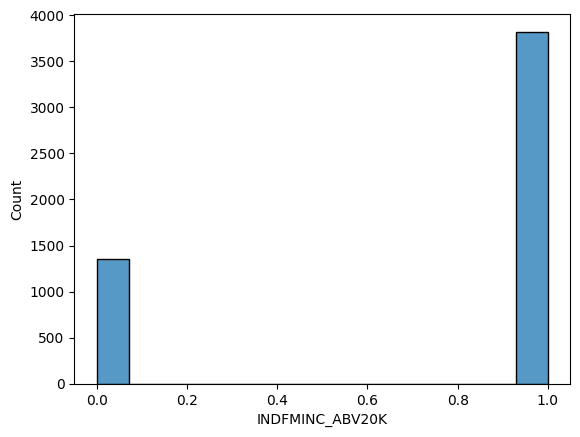

In [20]:
# Visualizando dados da nova coluna
utils.column_analysis(df, 'INDFMINC_ABV20K')

In [21]:
index = demo_cols.index('INDFMINC')
demo_cols.insert(index + 1, 'INDFMINC_ABV20K')

### Dados do PAG

#### Visualização

Coluna: PAG_MINW

describe():
count    5,334.00
mean       471.77
std        780.35
min          0.00
25%         35.00
50%        210.00
75%        568.93
max     10,777.83
Name: PAG_MINW, dtype: float64

value_counts(normalize=False):
0.00        950
27.71       102
55.43        95
124.71       70
415.70       68
           ... 
853.30        1
2,535.80      1
941.43        1
2,351.04      1
685.91        1
Name: PAG_MINW, Length: 1744, dtype: int64

isnull():
0

histplot():


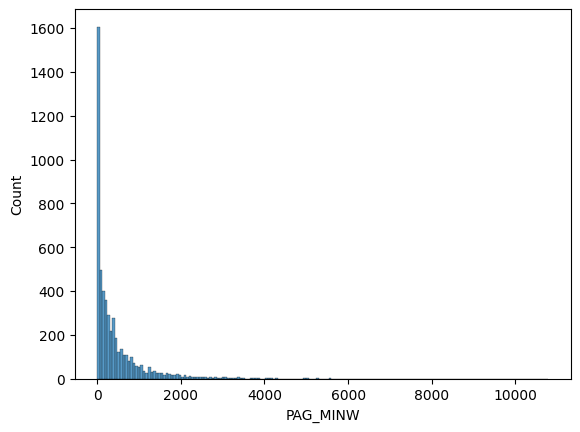



Coluna: ADHERENCE

describe():
count   5,334.00
mean        1.98
std         0.92
min         1.00
25%         1.00
50%         2.00
75%         3.00
max         3.00
Name: ADHERENCE, dtype: float64

value_counts(normalize=False):
1.00    2304
3.00    2196
2.00     834
Name: ADHERENCE, dtype: int64

isnull():
0

histplot():


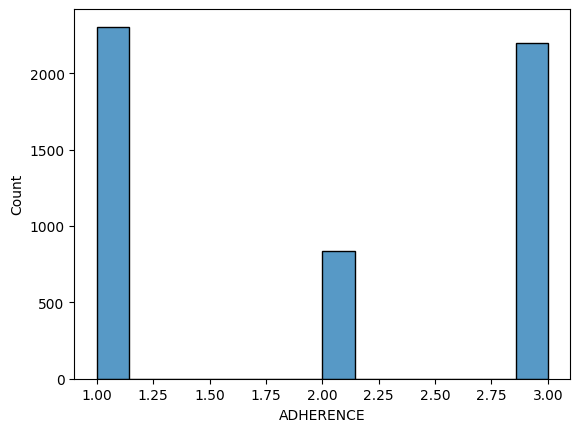

In [22]:
for col in pag_cols:
    utils.column_analysis(df, col, normalize=False)

#### Análise e Tratamento

##### PAG_MINW (outliers)
Esta coluna parece ter muitos outliers. Precisamos investigar mais para decidir como lidar com eles. 

Porém não foram encontrados indícios de que estes valores estejam incorretos, portanto não será feito nenhum tratamento extra

In [23]:
# Checando valores mais frequentes
df['PAG_MINW'].value_counts().iloc[:10]

0.00      950
27.71     102
55.43      95
124.71     70
415.70     68
110.85     64
41.57      64
69.28      56
13.86      56
83.14      52
Name: PAG_MINW, dtype: int64

<AxesSubplot: xlabel='PAG_MINW'>

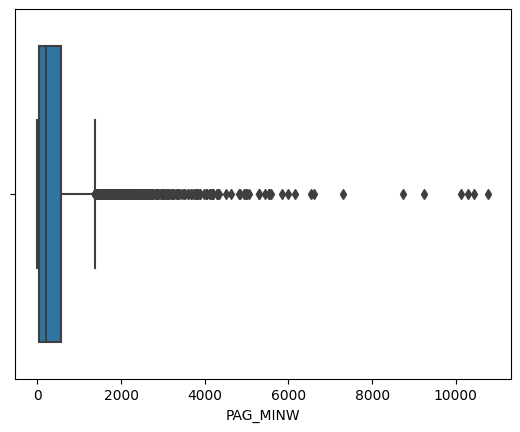

In [24]:
sns.boxplot(data=df, x="PAG_MINW")

3672.05542725173


<AxesSubplot: xlabel='PAG_MINW', ylabel='Count'>

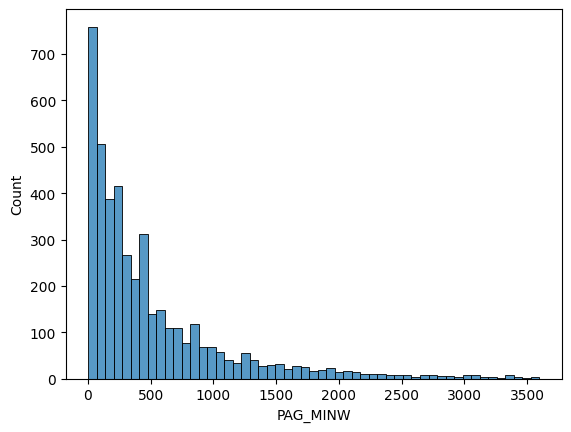

In [25]:
# Plotando dados sem o 0 e até o 99º percentil, para visualizar melhor a distribuição sem os outliers
percentile = df['PAG_MINW'].quantile(0.99)
print(percentile)

query = df.query('PAG_MINW > 0 and PAG_MINW < @percentile')

sns.histplot(data=df, x=query['PAG_MINW'])

In [26]:
# Checando viabilidade dos outliers
max_PAG_MINW = df['PAG_MINW'].max()

# Como atividades vigorosas contam minutos em dobro, vamos supor apenas atividades vigorosas para esta checagem
minutos_exercicio = max_PAG_MINW / 2
horas_exercicio =  minutos_exercicio / 60

print('Horas semanais de exercício:', horas_exercicio)
print('Horas diarias de exercício:', horas_exercicio / 7)

Horas semanais de exercício: 89.81524249422667
Horas diarias de exercício: 12.830748927746667


Passar quase 13h por praticando atividades físicas vigorosas parece pouco provável, mas talvez sejam atletas profissionais que tenham participado da pesquisa. Por isso, em princípio vamos manter estes dados.

### Dados do HEI

#### Visualização

Coluna: HEI2015C1_TOTALVEG

describe():
count   5,060.00
mean        3.20
std         1.47
min         0.00
25%         2.06
50%         3.22
75%         4.83
max         5.00
Name: HEI2015C1_TOTALVEG, dtype: float64

value_counts(normalize=False):
5.00    1181
0.00      74
3.05       2
2.53       2
2.62       2
        ... 
3.71       1
1.55       1
3.38       1
2.28       1
3.91       1
Name: HEI2015C1_TOTALVEG, Length: 3778, dtype: int64

isnull():
274

histplot():


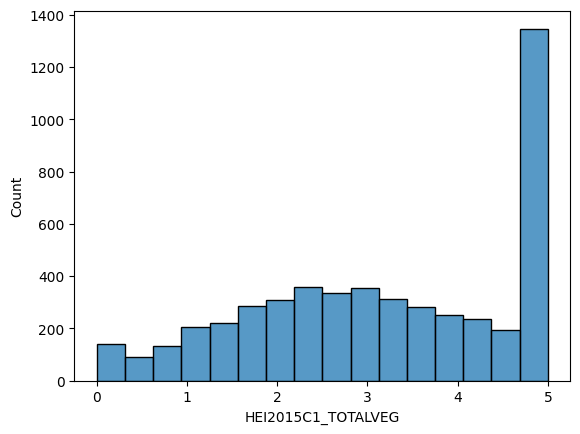



Coluna: HEI2015C2_GREEN_AND_BEAN

describe():
count   5,060.00
mean        1.81
std         2.14
min         0.00
25%         0.00
50%         0.06
75%         4.50
max         5.00
Name: HEI2015C2_GREEN_AND_BEAN, dtype: float64

value_counts(normalize=False):
0.00    2521
5.00    1155
3.95       2
1.15       2
4.28       2
        ... 
1.08       1
2.52       1
2.84       1
2.13       1
2.93       1
Name: HEI2015C2_GREEN_AND_BEAN, Length: 1364, dtype: int64

isnull():
274

histplot():


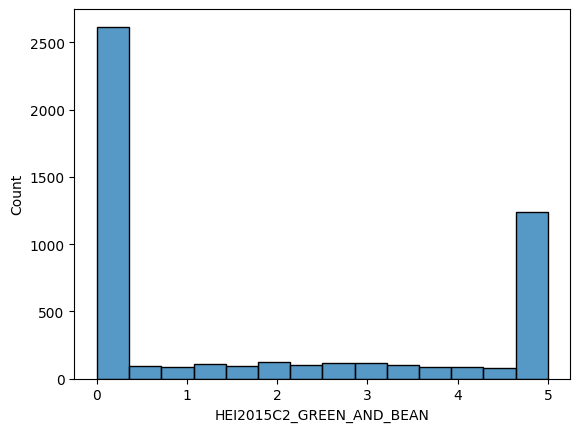



Coluna: HEI2015C3_TOTALFRUIT

describe():
count   5,060.00
mean        2.49
std         1.95
min         0.00
25%         0.45
50%         2.32
75%         4.94
max         5.00
Name: HEI2015C3_TOTALFRUIT, dtype: float64

value_counts(normalize=False):
5.00    1247
0.00     726
3.68       3
1.67       2
0.05       2
        ... 
2.08       1
2.08       1
3.76       1
1.35       1
2.31       1
Name: HEI2015C3_TOTALFRUIT, Length: 3078, dtype: int64

isnull():
274

histplot():


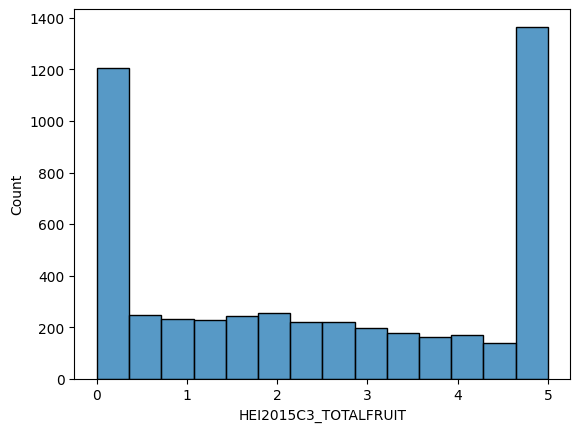



Coluna: HEI2015C4_WHOLEFRUIT

describe():
count   5,060.00
mean        2.36
std         2.17
min         0.00
25%         0.00
50%         2.08
75%         5.00
max         5.00
Name: HEI2015C4_WHOLEFRUIT, dtype: float64

value_counts(normalize=False):
5.00    1551
0.00    1451
0.05       4
3.91       2
4.93       2
        ... 
0.94       1
1.07       1
0.05       1
2.71       1
0.09       1
Name: HEI2015C4_WHOLEFRUIT, Length: 2043, dtype: int64

isnull():
274

histplot():


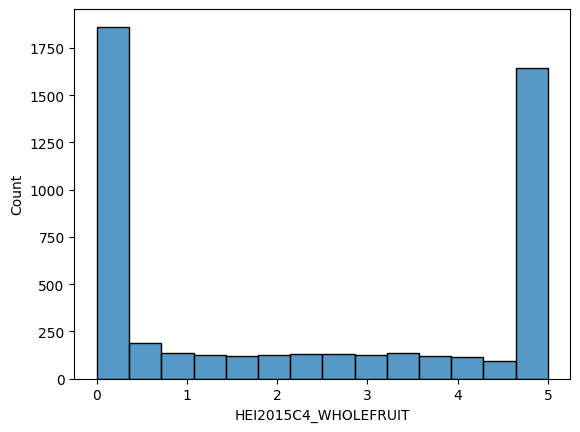



Coluna: HEI2015C5_WHOLEGRAIN

describe():
count   5,060.00
mean        1.76
std         1.92
min         0.00
25%         0.00
50%         1.03
75%         3.41
max         5.00
Name: HEI2015C5_WHOLEGRAIN, dtype: float64

value_counts(normalize=False):
0.00    1846
5.00     796
1.93       2
0.65       2
2.66       2
        ... 
0.66       1
1.34       1
1.25       1
4.71       1
0.93       1
Name: HEI2015C5_WHOLEGRAIN, Length: 2407, dtype: int64

isnull():
274

histplot():


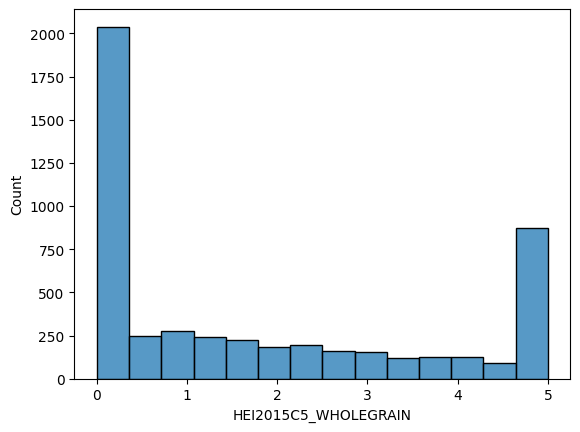



Coluna: HEI2015C6_TOTALDAIRY

describe():
count   5,060.00
mean        3.76
std         1.61
min         0.00
25%         2.59
50%         4.94
75%         5.00
max         5.00
Name: HEI2015C6_TOTALDAIRY, dtype: float64

value_counts(normalize=False):
5.00    2498
0.00      91
1.52       2
1.75       2
2.51       2
        ... 
3.56       1
4.12       1
1.87       1
4.35       1
2.15       1
Name: HEI2015C6_TOTALDAIRY, Length: 2456, dtype: int64

isnull():
274

histplot():


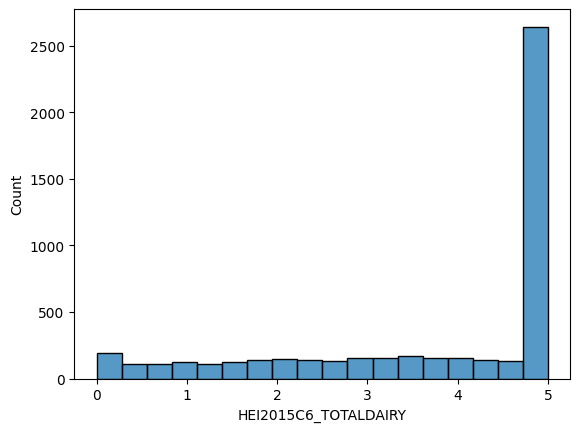



Coluna: HEI2015C7_TOTPROT

describe():
count   5,060.00
mean        4.43
std         1.01
min         0.00
25%         4.17
50%         5.00
75%         5.00
max         5.00
Name: HEI2015C7_TOTPROT, dtype: float64

value_counts(normalize=False):
5.00    3212
0.00      12
5.00       2
4.07       1
2.61       1
        ... 
4.48       1
2.08       1
0.87       1
4.88       1
3.76       1
Name: HEI2015C7_TOTPROT, Length: 1837, dtype: int64

isnull():
274

histplot():


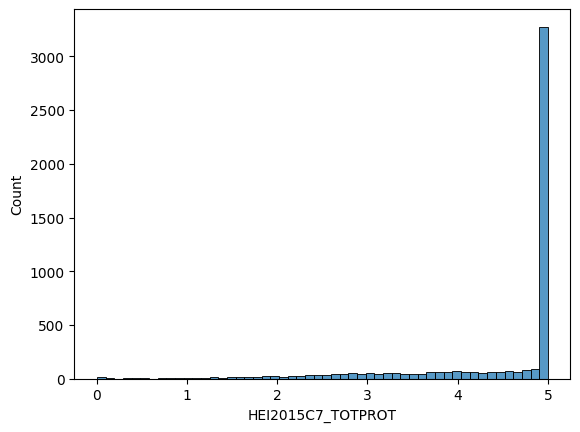



Coluna: HEI2015C8_SEAPLANT_PROT

describe():
count   5,060.00
mean        2.59
std         2.17
min         0.00
25%         0.00
50%         2.59
75%         5.00
max         5.00
Name: HEI2015C8_SEAPLANT_PROT, dtype: float64

value_counts(normalize=False):
5.00    1791
0.00    1299
3.97       2
3.84       2
1.94       2
        ... 
2.49       1
1.79       1
0.13       1
2.28       1
2.34       1
Name: HEI2015C8_SEAPLANT_PROT, Length: 1965, dtype: int64

isnull():
274

histplot():


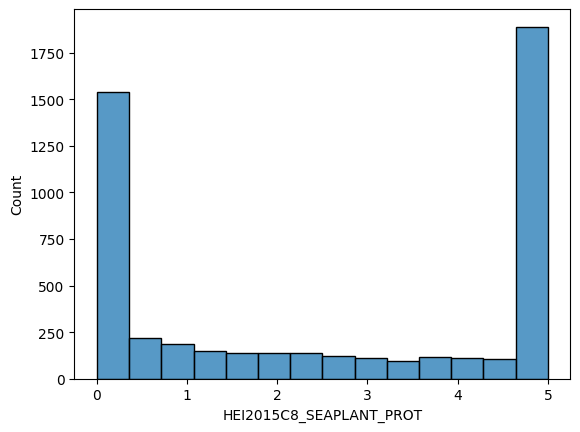



Coluna: HEI2015C9_FATTYACID

describe():
count   5,060.00
mean        4.71
std         3.24
min         0.00
25%         2.02
50%         4.43
75%         7.27
max        10.00
Name: HEI2015C9_FATTYACID, dtype: float64

value_counts(normalize=False):
10.00    603
0.00     459
0.68       1
4.28       1
4.59       1
        ... 
2.60       1
4.11       1
4.68       1
4.16       1
2.09       1
Name: HEI2015C9_FATTYACID, Length: 4000, dtype: int64

isnull():
274

histplot():


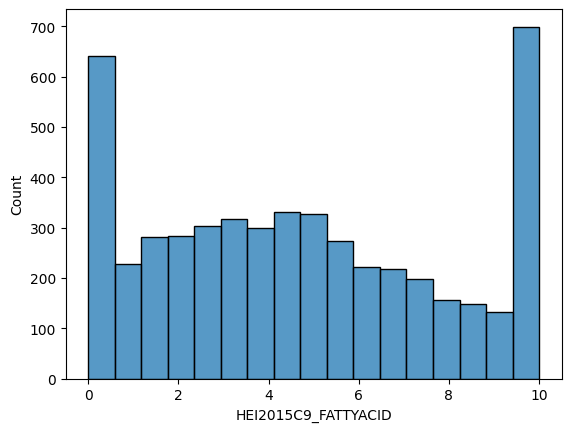



Coluna: HEI2015C10_SODIUM

describe():
count   5,060.00
mean        4.76
std         3.42
min         0.00
25%         1.59
50%         4.83
75%         7.65
max        10.00
Name: HEI2015C10_SODIUM, dtype: float64

value_counts(normalize=False):
0.00     830
10.00    514
2.85       2
3.40       2
2.30       1
        ... 
1.91       1
6.48       1
1.09       1
7.40       1
7.46       1
Name: HEI2015C10_SODIUM, Length: 3716, dtype: int64

isnull():
274

histplot():


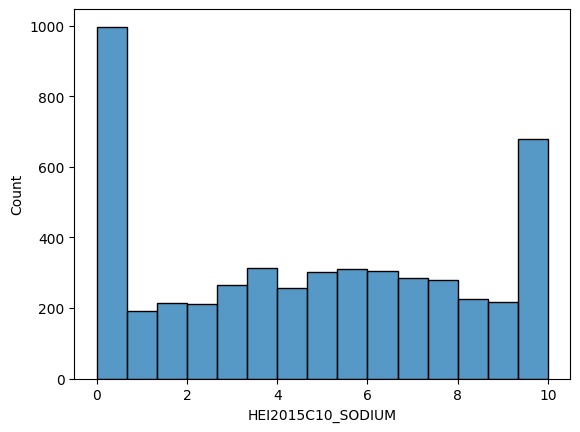



Coluna: HEI2015C11_REFINEDGRAIN

describe():
count   5,060.00
mean        5.80
std         3.50
min         0.00
25%         2.93
50%         6.23
75%         9.25
max        10.00
Name: HEI2015C11_REFINEDGRAIN, dtype: float64

value_counts(normalize=False):
10.00    996
0.00     599
7.90       2
2.91       2
4.60       2
        ... 
4.23       1
3.69       1
7.42       1
7.56       1
8.94       1
Name: HEI2015C11_REFINEDGRAIN, Length: 3460, dtype: int64

isnull():
274

histplot():


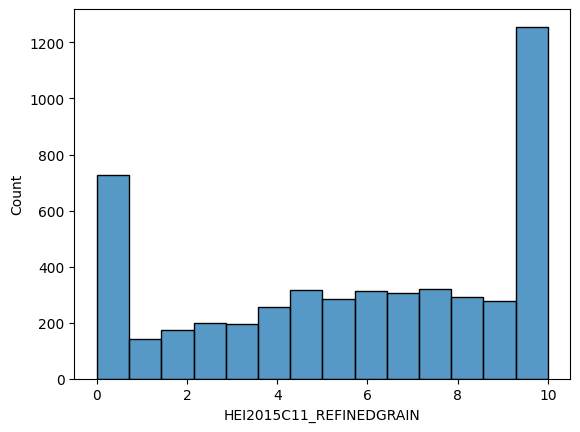



Coluna: HEI2015C12_SFAT

describe():
count   5,060.00
mean        6.07
std         3.18
min         0.00
25%         3.70
50%         6.41
75%         9.00
max        10.00
Name: HEI2015C12_SFAT, dtype: float64

value_counts(normalize=False):
10.00    897
0.00     318
6.85       2
4.90       1
9.59       1
        ... 
5.94       1
4.79       1
3.38       1
5.09       1
1.68       1
Name: HEI2015C12_SFAT, Length: 3846, dtype: int64

isnull():
274

histplot():


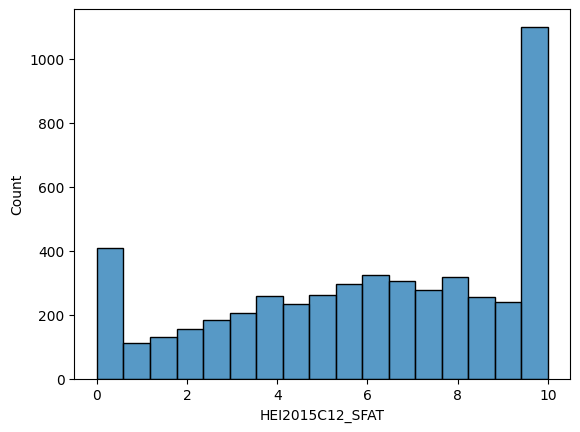



Coluna: HEI2015C13_ADDSUG

describe():
count   5,060.00
mean        6.22
std         3.33
min         0.00
25%         3.72
50%         6.86
75%         9.45
max        10.00
Name: HEI2015C13_ADDSUG, dtype: float64

value_counts(normalize=False):
10.00    997
0.00     428
8.15       2
5.21       2
5.29       1
        ... 
4.80       1
6.94       1
0.84       1
1.65       1
2.75       1
Name: HEI2015C13_ADDSUG, Length: 3635, dtype: int64

isnull():
274

histplot():


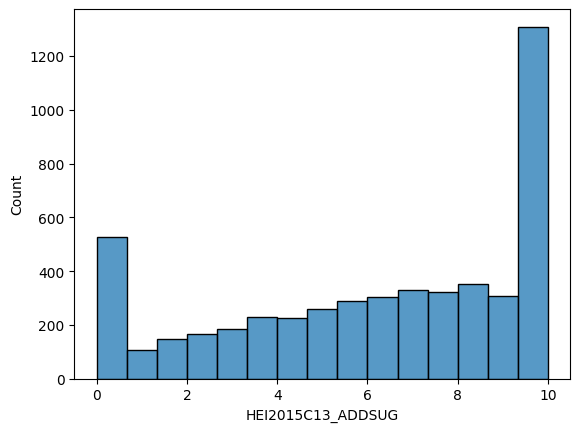



Coluna: HEI2015_TOTAL_SCORE

describe():
count   5,060.00
mean       49.97
std        12.32
min        16.06
25%        41.03
50%        49.51
75%        58.17
max        89.53
Name: HEI2015_TOTAL_SCORE, dtype: float64

value_counts(normalize=False):
45.00    3
52.79    1
55.26    1
41.14    1
53.89    1
        ..
61.50    1
37.32    1
55.28    1
33.40    1
45.79    1
Name: HEI2015_TOTAL_SCORE, Length: 5058, dtype: int64

isnull():
274

histplot():


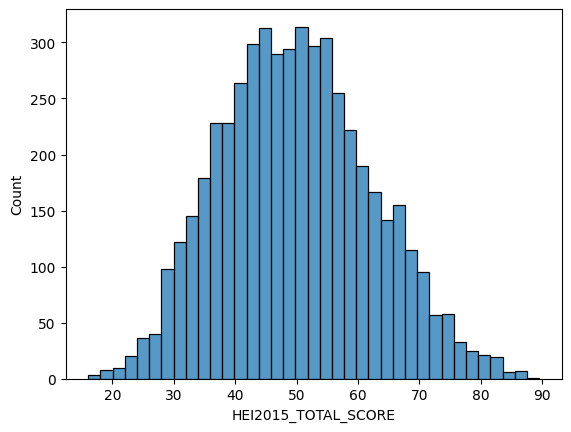

In [27]:
for col in hei_cols:
    utils.column_analysis(df, col, normalize=False)

#### Análise e Tratamento

##### HEI2015C5_WHOLEGRAIN e HEI2015C6_TOTALDAIRY (escalas diferentes)

Estas colunas deveriam ter valores de 0-10, porém em ambas o valor máximo é 5.0. Isto também se refletiu no cálculo de `HEI2015_TOTAL_SCORE`, que teoricamente poderia ir até 100, mas não passou de 90.

**Dúvidas:**
Estes valores são reais (e realmente nenhuma pessoa pontuou acima de 5), ou foi feita alguma transformação nos resultados?

##### HEI2015_TOTAL_SCORE (possível normalidade)
Sua distribuição se assemelha a uma curva de sino, mas será que é uma distribuição normal? Vamos testar:

In [28]:
shapiro(df[df['HEI2015_TOTAL_SCORE'].notna()]['HEI2015_TOTAL_SCORE'])

ShapiroResult(statistic=0.9946759343147278, pvalue=1.0064451442387545e-12)

Como o p-valor calculado é menor do que `alpha=0.05`, não podemos afirmar que seja uma distribuição normal

## Tratamento Geral

### Reordenação das Colunas

In [29]:
# Reordenando colunas
df = df[["SEQN"] + phq_cols + phq_score_cols + demo_cols + pag_cols + hei_cols]

### Tratamento de nulos

<AxesSubplot: >

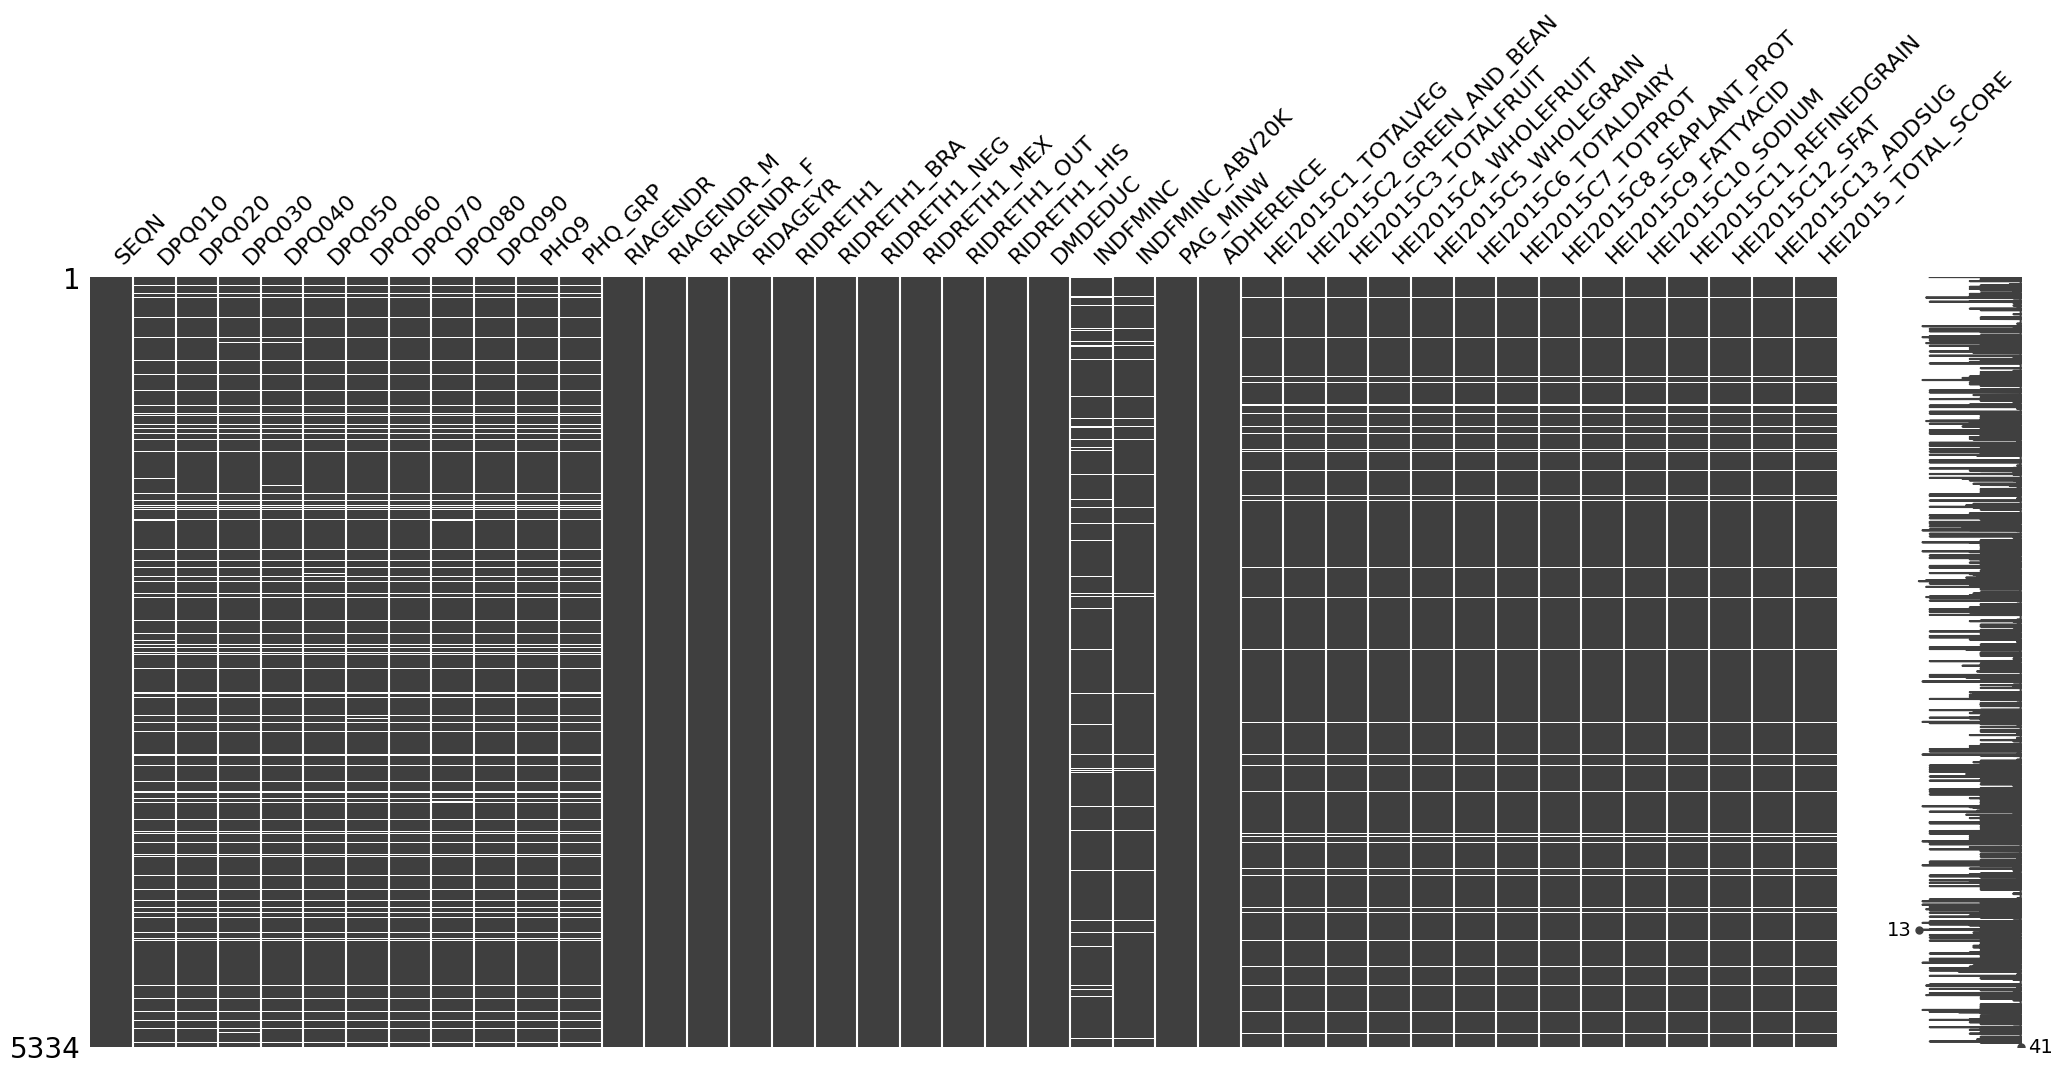

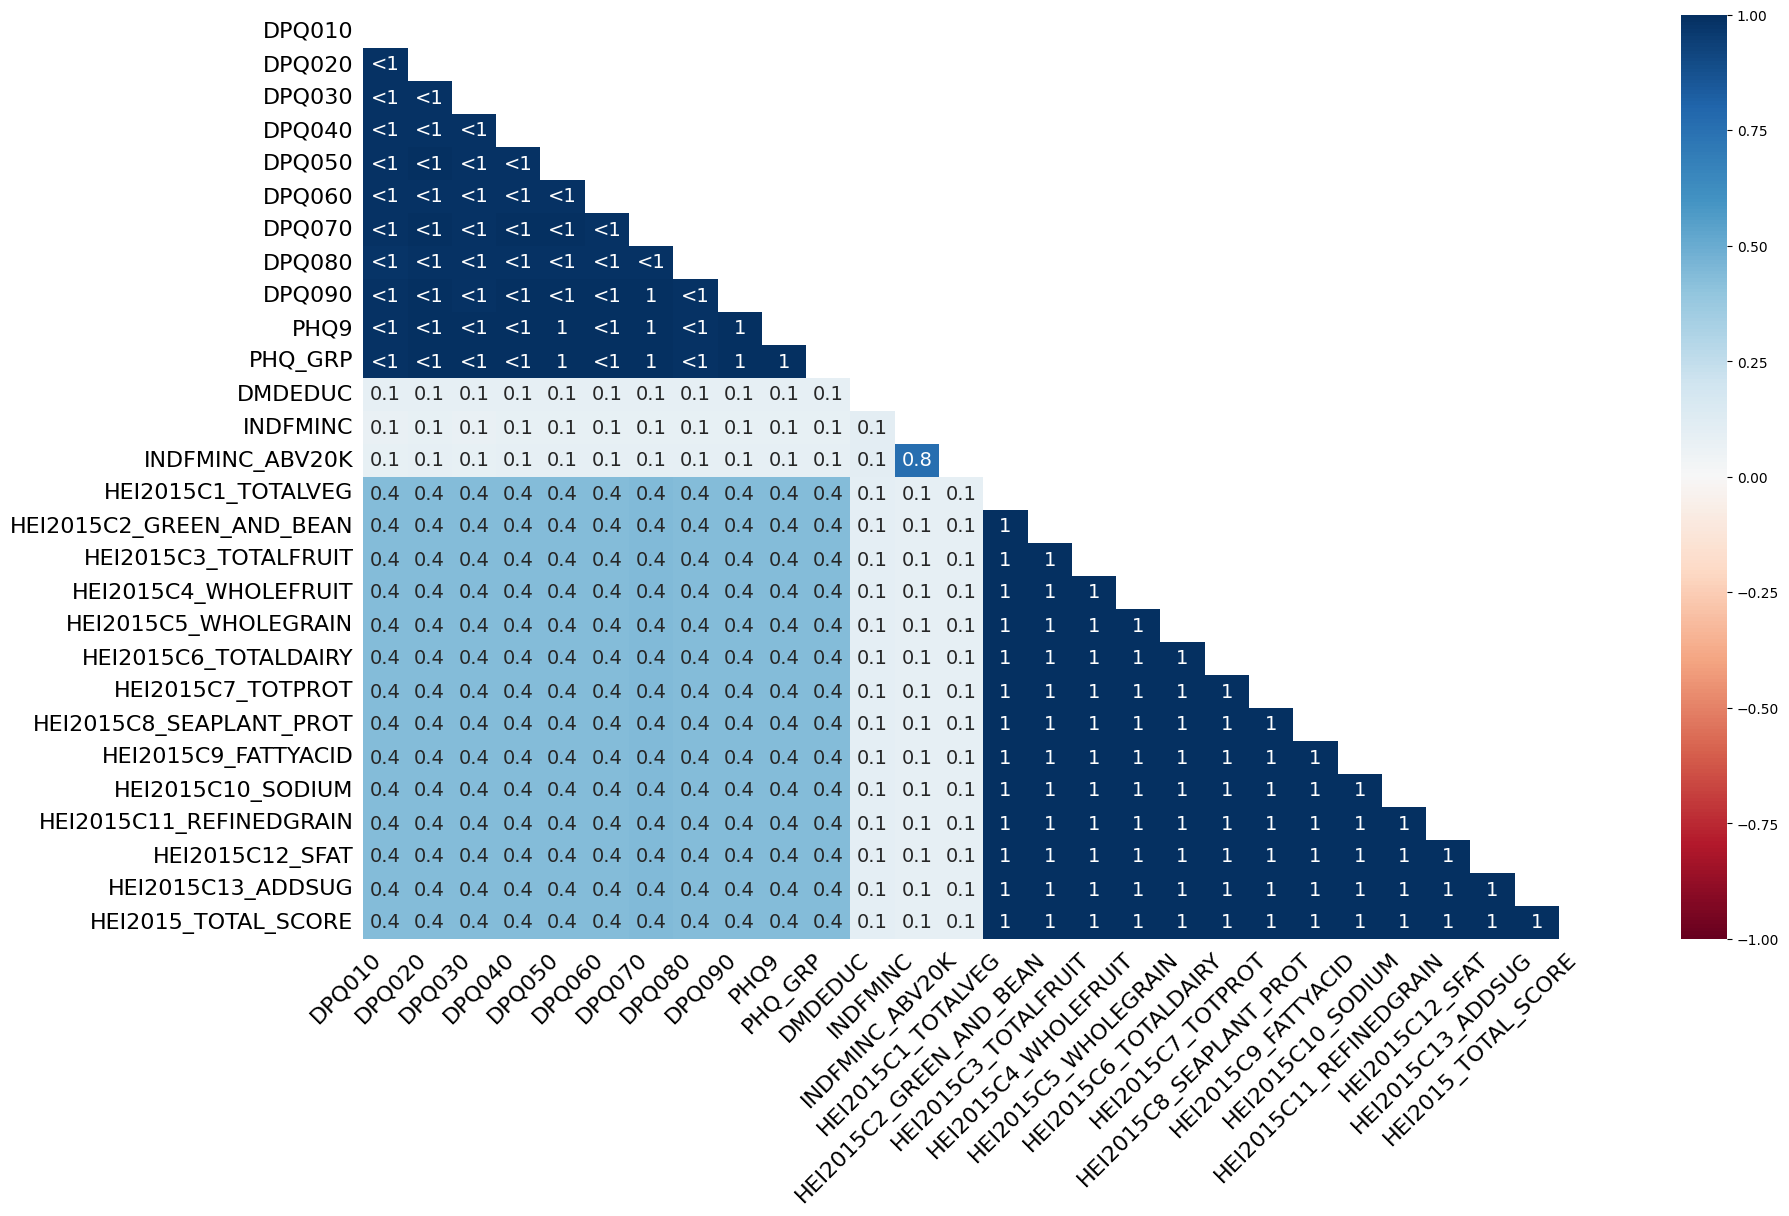

In [30]:
# Visualizando valores nulos
msno.matrix(df)
msno.heatmap(df)

Percebe-se uma grande correlação nos nulos de acordo com a sua origem.

In [31]:
# Contando quantas linhas possuem pelo menos um valor nulo
rows_with_null = df.isna().any(1).sum()

print('Linhas com pelo menos um nulo:', rows_with_null)
print('Porcentagem de linhas com pelo menos um nulo:', rows_with_null/df.shape[0])

Linhas com pelo menos um nulo: 833
Porcentagem de linhas com pelo menos um nulo: 0.15616797900262466


Aproximadamente 85% dos dados possuem todas as colunas, portanto vamos remover todas as linhas que possuam algum nulo.

In [32]:
# Removendo linhas que possuam pelo menos um valor nulo
df = df[df.notna().all(1)]

### Validação dos Dados

In [34]:
df.shape

(4501, 41)

In [33]:
# Validando dimensões do dataframe
assert df.shape == (4490, 41)

AssertionError: 

In [ ]:
# Validando colunas relacionadas à RIAGENDR    
RIAGENDR_deriv_cols = ['RIAGENDR_M', 'RIAGENDR_F']
assert utils.validate_derived_category_columns(df, 'RIAGENDR', RIAGENDR_deriv_cols)
assert (df.query('RIAGENDR == 1').sum().sum() == df.query('RIAGENDR_M == 1').sum().sum())
assert (df.query('RIAGENDR == 2').sum().sum() == df.query('RIAGENDR_F == 1').sum().sum())

# Validando colunas relacionadas à RIDRETH1    
RIDRETH1_deriv_cols = ['RIDRETH1_BRA', 'RIDRETH1_NEG', 'RIDRETH1_MEX', 'RIDRETH1_OUT', 'RIDRETH1_HIS', ]
assert utils.validate_derived_category_columns(df, 'RIDRETH1', RIDRETH1_deriv_cols)
assert (df.query('RIDRETH1 == 1').sum().sum() == df.query('RIDRETH1_BRA == 1').sum().sum())
assert (df.query('RIDRETH1 == 2').sum().sum() == df.query('RIDRETH1_NEG == 1').sum().sum())
assert (df.query('RIDRETH1 == 3').sum().sum() == df.query('RIDRETH1_MEX == 1').sum().sum())
assert (df.query('RIDRETH1 == 4').sum().sum() == df.query('RIDRETH1_OUT == 1').sum().sum())
assert (df.query('RIDRETH1 == 5').sum().sum() == df.query('RIDRETH1_HIS == 1').sum().sum())

In [ ]:
# Validar valores das colunas calculadas (scores PHQ e HEI)
assert utils.validate_score_columns(df, 'PHQ9', phq_cols)
assert utils.validate_score_columns(df, 'HEI2015_TOTAL_SCORE', hei_cols[:-1])

## Exportação dos Dados

In [ ]:
# Exportando o dataframe mesclado
output_path = '../data/output/'
output_file = 'step_2_output.csv'

df.to_csv(f"{output_path}{output_file}", sep=',', encoding='utf-8', index=False)